<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/Din%C3%A0mica_planet%C3%A0ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'equació diferencial que hem de resoldre és de la forma:

$\frac{d^2\vec{r}_{i}}{dt^2}m_{i}= Gm_{i}\sum{\frac{\vec{r}_{j}-\vec{r}_{i}}{|\vec{r}_{j}-\vec{r}_{i}|^3}m_{j}}$

On "i" és l'índex del cos que rep la força i "j" el dels cossos que fan força sobre ell.

Normalitzant per la Terra, queda:
$
\frac{d^2\vec{\tilde{r}}_{terra}}{d\tilde{t}^2}=\left[\frac{\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}}{|\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{lluna}}{\tilde{m}_{sol}}\frac{\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}}{|\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{mart}}{\tilde{m}_{sol}}\frac{\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}}{|\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}|^3}\right]
$

On tenim que ($r_i$ representta cada una de les components x, y o z):
$\tilde{r}_i= \frac{r_i}{r_0},\qquad \tilde{m}_i=\frac{m_i}{m_0}, \qquad \tilde{t}=\frac{t}{t_0}, \qquad r_0=(Gt_{0}^2m_{sol})^{1/3}$

Per la component x, per exemple, queda:
$
\frac{d^2\tilde{x}_{terra}}{d\tilde{t}^2}=\left[\frac{\tilde{x}_{sol}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{lluna}}{\tilde{m}_{sol}}\frac{\tilde{x}_{lluna}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{mart}}{\tilde{m}_{sol}}\frac{\tilde{x}_{mart}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}|^3}\right]
$


On: $\tilde{x_i}=\frac{x_i}{r_0}$

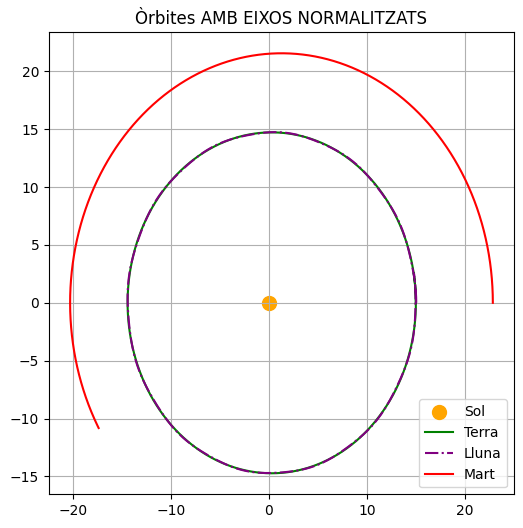

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22
m_mart= 6.4171e23

# Condicions inicials (en cartesianes)
# L'origen és el baricentre del sistema solar
# Format: [x,y,z,vx,vy,vz]
# Inici a les 04:42 del 21 de Juliol del 2025 (solstici d'estiu)
# Això és per el temps central Europeu, per tant hi ha un lleuger error
# Ja que no està a Bellaterra/Barcelona exactament.

lluna= np.array([-1.081554325966438E+06, -1.526346829987447E+08, 5.289505218940973E+04,
 2.874182090220137E+01, 6.308874791782940E-01, 6.961580076988511E-02])

terra= np.array([-1.393448650322997E+06, -1.528245787749783E+08, 3.246810235627741E+04,
 2.932512160332670E+01, -2.663812783881785E-01, -1.233690374052812E-03])

sol= np.array([-6.714001826750380E+05, -8.034375730918228E+05, 2.366931954465597E+04,
 1.263663211842965E-02, -3.218117708051999E-03, -2.265135898351946E-04])

mart= np.array([-2.458249892172696E+08, -2.180156046072930E+07, 5.595389337974356E+06,
 2.984615568179249E+00, -2.207313642037887E+01, -5.356157436277602E-01])

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic



lluna= np.concatenate((lluna[:3]*(1/r0), lluna[3:]*(t0/r0), [m_lluna/m0]))
terra= np.concatenate((terra[:3]*(1/r0), terra[3:]*(t0/r0), [m_terra/m0]))
sol= np.concatenate((sol[:3]*(1/r0), sol[3:]*(t0/r0), [m_sol/m0]))
mart= np.concatenate((mart[:3]*(1/r0), mart[3:]*(t0/r0), [m_mart/m0]))

planetes={"luna": lluna,
          "terra": terra,
          "sol": sol,
          "mars": mart}

# CONDICIONS INICIALS
masses= [m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0]

UA= 1.495978707e11 # unitat astronòmica, distància mitjana terra-sol
terra_dist= UA
mart_dist= 1.524 * UA
lluna_dist= 384400e3 # distància promig terra i lluna

v_terra= 0.99*np.sqrt(G*m_sol/terra_dist)
v_mart= 0.97*np.sqrt(G*m_sol/mart_dist)
v_lluna= 0.995*np.sqrt(G*m_terra/lluna_dist)

posicions= np.zeros((4,3))
posicions[1]= np.array([terra_dist, 0, 0])
posicions[2]= posicions[1] + np.array([lluna_dist, 0, 0])
posicions[3]= np.array([mart_dist, 0, 0])
posicions_norm=posicions/r0

# VELOCITATS EN SI
velocitats= np.zeros((4,3))
velocitats[1]= np.array([0, v_terra, 0])
velocitats[2]= velocitats[1] + np.array([0, v_lluna, 0])
velocitats[3]= np.array([0, v_mart, 0])

# Per conservar moment total
p= m_terra*velocitats[1] + m_lluna*velocitats[2] + m_mart*velocitats[3]
velocitats[0]= -p/m_sol

velocitats_norm= velocitats*(t0/r0)

def acceleracions(pos, masses):
    N= len(masses) # Nombre de planetes
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j: # Si i ≠ j
              diff= pos[j] - pos[i]
              d= np.linalg.norm(diff)
              acc[i] += masses[j] * diff / d**3
    return acc

def rk4(pos, vel, masses, h): # h és l'interval de temps
    K1= vel
    L1= acceleracions(pos, masses)
    pos2= pos + 0.5*h*K1
    vel2= vel + 0.5*h*L1
    K2= vel2
    L2= acceleracions(pos2, masses)
    pos3= pos + 0.5*h*K2
    vel3= vel + 0.5*h*L2
    K3= vel3
    L3= acceleracions(pos3, masses)
    pos4= pos + h*K3
    vel4= vel + h*L3
    K4= vel4
    L4= acceleracions(pos4, masses)

    pos_nova= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nova= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nova, vel_nova

dies= 365
h_dies= 1/24
passos= int(dies/h_dies)
h=h_dies

traj= np.zeros((passos+1,4,3))
traj[0]= posicions_norm

pos = posicions_norm.copy()
vel = velocitats_norm.copy()

for k in range(1, passos+1):
    pos, vel = rk4(pos, vel, masses, h)
    traj[k] = pos

# PLOTEGEM
plt.figure(figsize=(6,6))
# plt.plot(traj[:,0,0], traj[:,0,1], label="Sol") # No es veu res perquè es mou molt poc
plt.scatter(traj[0,0,0], traj[0,0,1], label="Sol", color="orange", s=100) # Posició inicial sol
plt.plot(traj[:,1,0], traj[:,1,1], label="Terra", color= "green")
plt.plot(traj[:,2,0], traj[:,2,1], label="Lluna", color="purple", linestyle="-.")
plt.plot(traj[:,3,0], traj[:,3,1], label="Mart", color="red")

plt.grid(True)
plt.legend()
plt.title("Òrbites AMB EIXOS NORMALITZATS")
plt.show()

$
\frac{d^2\tilde{x}_{terra}}{d\tilde{t}^2}=\left[\frac{\tilde{x}_{sol}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{lluna}}{\tilde{m}_{sol}}\frac{\tilde{x}_{lluna}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{mart}}{\tilde{m}_{sol}}\frac{\tilde{x}_{mart}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}|^3}\right]
$

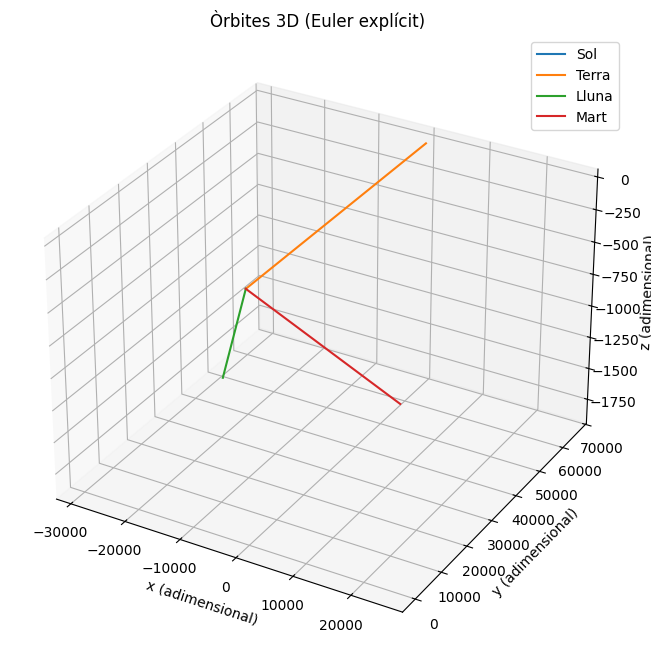

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22
m_mart= 6.4171e23

# Condicions inicials (en cartesianes)
# L'origen és el baricentre del sistema solar
# Format: [x,y,z,vx,vy,vz]
# Inici a les 04:42 del 21 de Juliol del 2025 (solstici d'estiu)
# Això és per el temps central Europeu, per tant hi ha un lleuger error
# Ja que no està a Bellaterra/Barcelona exactament.

lluna= np.array([-1.081554325966438E+06, -1.526346829987447E+08, 5.289505218940973E+04,
 2.874182090220137E+01, 6.308874791782940E-01, 6.961580076988511E-02])

terra= np.array([-1.393448650322997E+06, -1.528245787749783E+08, 3.246810235627741E+04,
 2.932512160332670E+01, -2.663812783881785E-01, -1.233690374052812E-03])

sol= np.array([-6.714001826750380E+05, -8.034375730918228E+05, 2.366931954465597E+04,
 1.263663211842965E-02, -3.218117708051999E-03, -2.265135898351946E-04])

mart= np.array([-2.458249892172696E+08, -2.180156046072930E+07, 5.595389337974356E+06,
 2.984615568179249E+00, -2.207313642037887E+01, -5.356157436277602E-01])

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic



lluna= np.concatenate((lluna[:3]*(1/r0), lluna[3:]*(t0/r0), [m_lluna/m0]))
terra= np.concatenate((terra[:3]*(1/r0), terra[3:]*(t0/r0), [m_terra/m0]))
sol= np.concatenate((sol[:3]*(1/r0), sol[3:]*(t0/r0), [m_sol/m0]))
mart= np.concatenate((mart[:3]*(1/r0), mart[3:]*(t0/r0), [m_mart/m0]))

planetes={"luna": lluna,
          "terra": terra,
          "sol": sol,
          "mars": mart}

def acceleració(Num, terra, sol, lluna, mart):
  if Num=="terra":  #Terra
    dist_s = np.linalg.norm(sol[:3]-terra[:3])**3
    dist_l = np.linalg.norm(lluna[:3]-terra[:3])**3
    dist_m = np.linalg.norm(mart[:3]-terra[:3])**3

    a_x= ((sol[0]-terra[0])/dist_s + lluna[6]*(lluna[0]-terra[0])/dist_l + mart[6]*(mart[0]-terra[0])/dist_m)
    a_y= ((sol[1]-terra[1])/dist_s + lluna[6]*(lluna[1]-terra[1])/dist_l + mart[6]*(mart[1]-terra[1])/dist_m)
    a_z= ((sol[2]-terra[2])/dist_s + lluna[6]*(lluna[2]-terra[2])/dist_l + mart[6]*(mart[2]-terra[2])/dist_m)

    return np.array([a_x, a_y, a_z])

  elif Num=="sol":  #Sol
    dist_t = np.linalg.norm(terra[:3]-sol[:3])**3
    dist_l = np.linalg.norm(lluna[:3]-sol[:3])**3
    dist_m = np.linalg.norm(mart[:3]-sol[:3])**3

    a_x= (terra[6]*(terra[0]-sol[0])/dist_t + lluna[6]*(lluna[0]-sol[0])/dist_l + mart[6]*(mart[0]-sol[0])/dist_m)
    a_y= (terra[6]*(terra[1]-sol[1])/dist_t + lluna[6]*(lluna[1]-sol[1])/dist_l + mart[6]*(mart[1]-sol[1])/dist_m)
    a_z= (terra[6]*(terra[2]-sol[2])/dist_t + lluna[6]*(lluna[2]-sol[2])/dist_l + mart[6]*(mart[2]-sol[2])/dist_m)

    return np.array([a_x, a_y, a_z])

  elif Num=="luna":  #Lluna
    dist_t = np.linalg.norm(terra[:3]-lluna[:3])**3
    dist_s = np.linalg.norm(sol[:3]-lluna[:3])**3
    dist_m = np.linalg.norm(mart[:3]-lluna[:3])**3

    a_x= (terra[6]*(terra[0]-lluna[0])/dist_t + (sol[0]-lluna[0])/dist_s + mart[6]*(mart[0]-lluna[0])/dist_m)
    a_y= (terra[6]*(terra[1]-lluna[1])/dist_t + (sol[1]-lluna[1])/dist_s + mart[6]*(mart[1]-lluna[1])/dist_m)
    a_z= (terra[6]*(terra[2]-lluna[2])/dist_t + (sol[2]-lluna[2])/dist_s + mart[6]*(mart[2]-lluna[2])/dist_m)

    return np.array([a_x, a_y, a_z])

  elif Num=="mars":  #Mart
    dist_t = np.linalg.norm(mart[:3]-terra[:3])**3
    dist_l = np.linalg.norm(mart[:3]-lluna[:3])**3
    dist_s= np.linalg.norm(mart[:3]-sol[:3])**3

    a_x= (terra[6]*(terra[0]-mart[0])/dist_t + (sol[0]-mart[0])/dist_s + lluna[6]*(lluna[0]-mart[0])/dist_l)
    a_y= (terra[6]*(terra[1]-mart[1])/dist_t + (sol[1]-mart[1])/dist_s + lluna[6]*(lluna[1]-mart[1])/dist_l)
    a_z= (terra[6]*(terra[2]-mart[2])/dist_t + (sol[2]-mart[2])/dist_s + lluna[6]*(lluna[2]-mart[2])/dist_l)

    return np.array([a_x, a_y, a_z])
  else:
    return None


# def Euler_explícit(sist_sol, dt):
#   #Retorna el diccionari dels planetes a temps i+1

#   sist_sol = copy.deepcopy(sist_sol)
#   for j in sist_sol:
#     sist_sol[j][:3] = sist_sol[j][:3] + dt * sist_sol[j][3:6]

#   #Velocitats
#   for j in sist_sol:
#     sist_sol[j][3:6] = sist_sol[j][3:6] + dt * acceleració(j, sist_sol["terra"], sist_sol["sol"], sist_sol["luna"], sist_sol["mars"])

#   return sist_sol
def Euler_explícit(sist_sol, dt):
  sist_vell = copy.deepcopy(sist_sol)
  sist_nou = copy.deepcopy(sist_sol)
  # Velocitats (primer perquè Euler-Cromer)
  for j in sist_vell:
    sist_nou[j][3:6] = sist_vell[j][3:6] + dt * acceleració(j, sist_vell["terra"], sist_vell["sol"], sist_vell["luna"], sist_vell["mars"])
  # Posicions
  for j in sist_vell:
    sist_nou[j][:3] = sist_vell[j][:3] + dt * sist_nou[j][3:6]

  return sist_nou


t_f = 365
dt = 1/24
res=[copy.deepcopy(planetes)]
passos = int(t_f/dt)
for i in range(passos):
  res.append(copy.deepcopy(Euler_explícit(res[-1],dt)))

from mpl_toolkits.mplot3d import Axes3D

# Extreure trajectòries
x_t, y_t, z_t = [], [], []
x_l, y_l, z_l = [], [], []
x_s, y_s, z_s = [], [], []
x_m, y_m, z_m = [], [], []

for estat in res:
    x_t.append(estat["terra"][0])
    y_t.append(estat["terra"][1])
    z_t.append(estat["terra"][2])

    x_l.append(estat["luna"][0])
    y_l.append(estat["luna"][1])
    z_l.append(estat["luna"][2])

    x_s.append(estat["sol"][0])
    y_s.append(estat["sol"][1])
    z_s.append(estat["sol"][2])

    x_m.append(estat["mars"][0])
    y_m.append(estat["mars"][1])
    z_m.append(estat["mars"][2])

# Plot 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_s, y_s, z_s, label="Sol")
ax.plot(x_t, y_t, z_t, label="Terra")
ax.plot(x_l, y_l, z_l, label="Lluna")
ax.plot(x_m, y_m, z_m, label="Mart")

ax.set_xlabel("x (adimensional)")
ax.set_ylabel("y (adimensional)")
ax.set_zlabel("z (adimensional)")
ax.legend()

ax.set_title("Òrbites 3D (Euler explícit)")

plt.show()




